In [4]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
%matplotlib inline

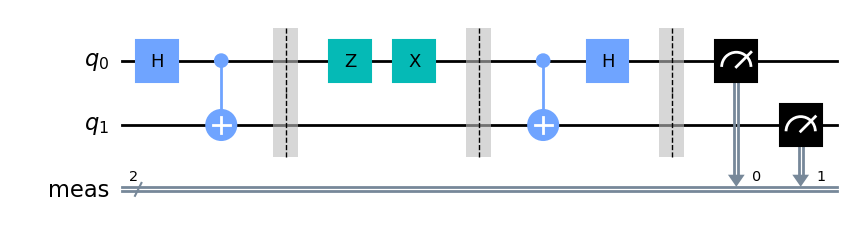

In [5]:
circuit = QuantumCircuit(2)

# Prepare the Bell state and distribute qubits
circuit.h(0) 
circuit.cx(0, 1)
circuit.barrier()

#Encode and transmition
match message := '11': # the message
    case '00':
        circuit.id(0)
    case '01':
        circuit.z(0)
    case '10':
        circuit.x(0)
    case '11':
        circuit.z(0)
        circuit.x(0)

circuit.barrier()

#decode
circuit.cx(0, 1)
circuit.h(0)

#measures the qubits to read the message
circuit.measure_all()
circuit.draw(output='mpl')


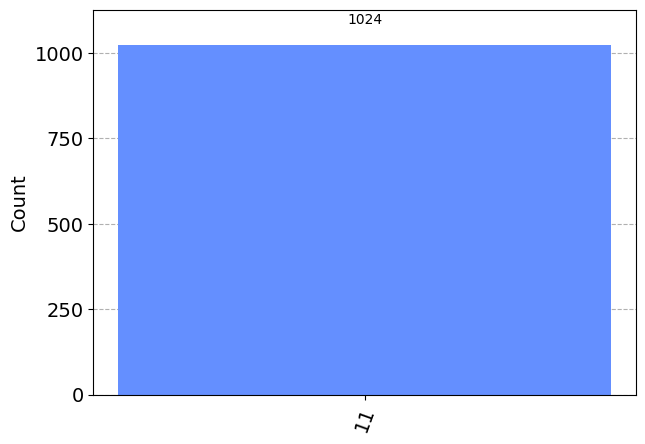

In [6]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator).result()
plot_histogram(result.get_counts())